In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [4]:
df=pd.read_csv(r'D:\Simplilearn all projects\Data\Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df = df.drop(['Unnamed: 0'],axis=1)

In [6]:
df.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [7]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [8]:
import statsmodels.formula.api as smf
model = smf.ols(formula='sales ~ TV + newspaper + radio',data=df).fit()

In [9]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 24 Mar 2022   Prob (F-statistic):           1.58e-96
Time:                        22:33:12   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
radio          0.1885      0.009     21.893      0.000       0.172       0.206
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### if p_value < 0.05 means accept alternate hypothesis (feature is significant (feature is important))

In [10]:
df.drop(['newspaper'],axis=1,inplace=True)

In [11]:
df.head()

,TV,radio,sales
0,230.1,37.8,22.1
1,44.5,39.3,10.4
2,17.2,45.9,9.3
3,151.5,41.3,18.5
4,180.8,10.8,12.9


In [12]:
df.corr()

,TV,radio,sales
TV,1.000000,0.054809,0.782224
radio,0.054809,1.000000,0.576223
sales,0.782224,0.576223,1.000000


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

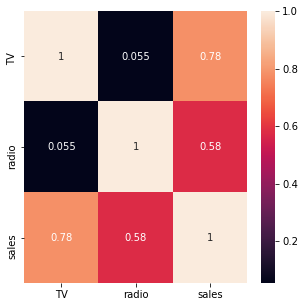

In [14]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

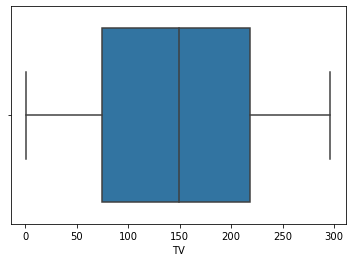

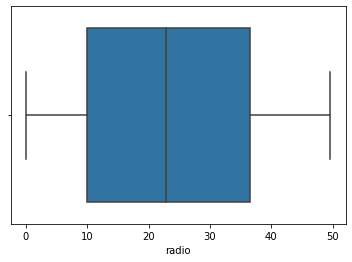

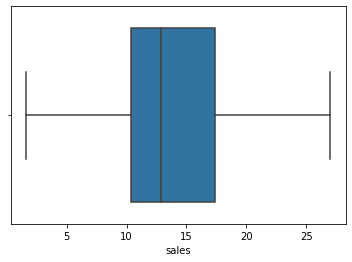

In [15]:
for i in df:
    sns.boxplot(df[i])
    plt.show()

In [16]:
x = df.drop(['sales'],axis=1)
y = df.sales

In [17]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [18]:
x

,TV,radio
0,230.1,37.8
1,44.5,39.3
2,17.2,45.9
3,151.5,41.3
4,180.8,10.8
...,...,...
195,38.2,3.7
196,94.2,4.9
197,177.0,9.3
198,283.6,42.0


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [21]:
print(x.shape,x_train.shape,x_test.shape)

(200, 2) (140, 2) (60, 2)


In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lr=LinearRegression()

In [24]:
lr.fit(x_train,y_train)

LinearRegression()

In [25]:
from sklearn.metrics import r2_score,mean_absolute_error
from math import sqrt


In [26]:
print(r2_score(y_train,lr.predict(x_train)))

0.9048377867980043


In [27]:
print(r2_score(y_test,lr.predict(x_test)))

0.8656253548947075


In [28]:
print(sqrt(r2_score(y_train,lr.predict(x_train))))

0.9512296183351338


In [29]:
print(sqrt(r2_score(y_test,lr.predict(x_test))))

0.9303898940200863


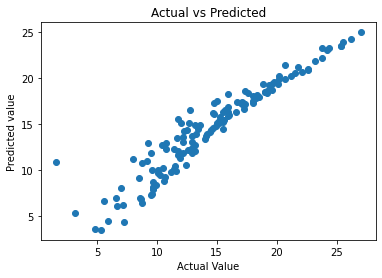

In [30]:
plt.scatter(y_train,lr.predict(x_train))
plt.xlabel('Actual Value')
plt.ylabel('Predicted value')
plt.title('Actual vs Predicted')
plt.show()

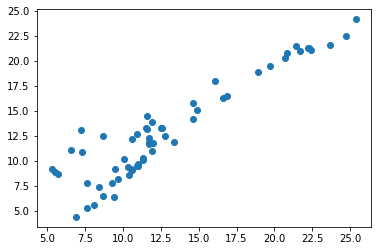

In [31]:
plt.scatter(y_test,lr.predict(x_test))
plt.show()

In [32]:
pd.DataFrame({'Actual':y_test,'Predicted':lr.predict(x_test).round(1)})

,Actual,Predicted
95,16.9,16.4
15,22.4,21.1
30,21.4,21.5
158,7.3,10.8
128,24.7,22.5
115,12.6,13.2
69,22.3,21.3
170,8.4,7.4
174,11.5,13.3
45,14.9,15.1


In [33]:
pd.DataFrame({'Actual':y_train,'Predicted':lr.predict(x_train).round(1)}).head(10)

,Actual,Predicted
169,15.0,17.5
97,15.5,15.2
31,11.9,11.3
12,9.2,11.0
35,12.8,16.5
119,6.6,6.9
42,20.7,21.4
189,6.7,6.1
90,11.2,9.7
136,9.5,11.9


In [34]:
tv = float(input('enter the price of the TV :'))

enter the price of the TV :425


In [35]:
radio = float(input('enter the price of radio :'))

enter the price of radio :25.25


In [36]:
sales = lr.predict([[tv,radio]])

In [37]:
print('Your predicted sales is',sales)

Your predicted sales is [26.68628986]
